In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
from pprint import pprint


In [30]:
#########
INPUT_FILE_ENG = "../data_preproc/data_subset_en_5000_from_ew-sew_08_24_18h"
INPUT_FILE_FRE = "../data_preproc/data_subset_fre_5000_from_WiViCov2_08_31_10h"
INPUT_FILE_GER = "../data_preproc/data_subset_ger_5000_from_DEPlain_09_05_17h"
#########
input_files = [INPUT_FILE_ENG, INPUT_FILE_FRE, INPUT_FILE_GER]
input_files_found = []


for input_file in input_files:
    if not os.path.exists(input_file):
        print("File ", input_file , " not found. Files in the directory:")
        print(os.listdir(os.path.dirname(input_file)))
    else:
        print("Found Dataset: ", input_file)
        input_files_found.append(input_file)

Found Dataset:  ../data_preproc/data_subset_en_5000_from_ew-sew_08_24_18h
Found Dataset:  ../data_preproc/data_subset_fre_5000_from_WiViCov2_08_31_10h
Found Dataset:  ../data_preproc/data_subset_ger_5000_from_DEPlain_09_05_17h


In [31]:
def get_token_lengths(sentences):
    return [len(sentence.split()) for sentence in sentences]

def get_token_lengths(sentences):
    return [len(sentence.split()) for sentence in sentences]

def compute_statistics(lengths):
    return {
        'Mean': np.mean(lengths),
        'Median': np.median(lengths),
        'Standard Deviation': np.std(lengths)
    }

[('57224', 'Toxicofera (Greek for "those who bear toxins") , is a hypothetical clade which represents about 4600 species (nearly 60 %) of extant squamates (scaled lizards.)'), ('117533', 'The islands of the Caribbean Sea, collectively known as the West Indies, are sorted by size and location into the Bahamas (or Lucayan archipelago, which includes the Turks and Caicos Islands) , the Lesser Antilles, and the Greater Antilles.'), ('3709', 'Some websites do not allow typographic quotation marks or apostrophes in posts (one such example being YouTube) .'), ('50928', 'Ecological yield is the harvestable population growth of an ecosystem.'), ('126524', "When he was 16-years-old, Davey's mother left with him to England in 1931.")]
plotted set  0
[('37241', "Panurus biarmicus La Panure à moustaches (Panurus biarmicus), anciennement appelée mésange à moustaches, est une espèce de passereaux d'Europe, l'unique représentante du genre Panurus et de la famille des Panuridae."), ('35958', "Monsieur 

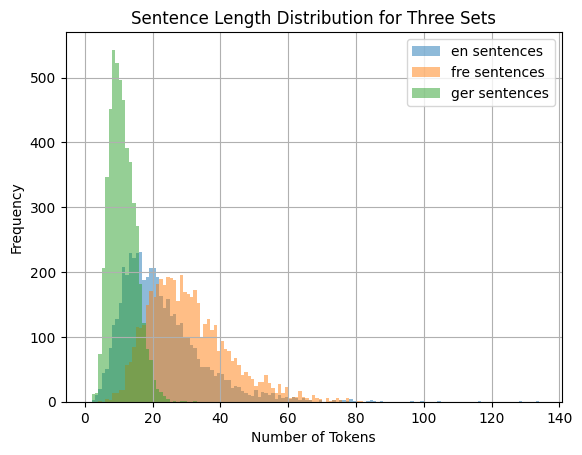

In [34]:
## Compare sentence lengths of different datasets

plot_file_name = '../figures/analysis_preproc_data__sent_len_comparison.png'
stats_list = []

for idx, input_file in enumerate(input_files_found):

    with open(input_file, "r") as file:
        data = [tuple(line.strip().split('|')) for line in file if line.strip()]

    print(data[:5])

    sentences = [sentence for _, sentence in data]

    lengths = get_token_lengths(sentences)

    stats = compute_statistics(lengths)
    stats["Language"] = input_file.split("_")[3]
    stats_list.append(stats)


    plt.hist(lengths, bins=range(1, max(lengths) + 2), alpha=0.5, label=stats["Language"]+ " sentences")

    print("plotted set ", idx)


plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Sentence Length Distribution for Three Sets')
plt.legend(loc='upper right')
plt.grid(True)
plt.savefig(plot_file_name)
plt.show()

In [33]:
for stats in stats_list:
    pprint(stats)

{'Language': 'en',
 'Mean': 21.835,
 'Median': 19.0,
 'Standard Deviation': 11.925224316548515}
{'Language': 'fre',
 'Mean': 29.9252,
 'Median': 28.0,
 'Standard Deviation': 11.776468271939597}
{'Language': 'ger',
 'Mean': 10.6116,
 'Median': 10.0,
 'Standard Deviation': 3.7689183381973135}
